# Предсказание заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

<div class="alert alert-block alert-info">
    
**Цель проекта:** построить модель для предсказания количества заказов такси на следующий час.
    
**Входные данные:** исторические данные о заказах такси в аэропортах.    

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Подготовка данных

In [122]:
data = pd.read_csv("taxi.csv", parse_dates=[0], index_col=[0])

In [123]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<div class="alert alert-block alert-info">
Видим, что всего 26496 записей в исходном наборе данных.

In [125]:
data = data.resample('1H').mean()

In [126]:
len(data)

4416

<div class="alert alert-block alert-info">
После ресемплирования по одному часу получили временной ряд с 4416 записями.

## Анализ данных 

In [127]:
#Проверим, в хронологическом ли порядке расположен временной ряд
data.index.is_monotonic

True

In [ ]:
#Проверим данные на пропуски
data.isna().sum()

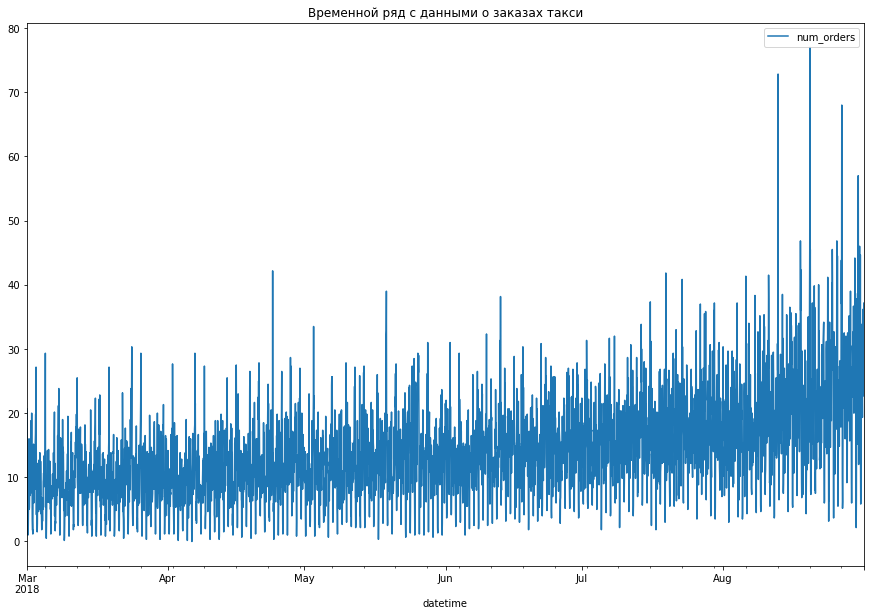

In [128]:
#Посмотрим, как выглядит временной ряд
data.plot(figsize=(15,10), title="Временной ряд с данными о заказах такси")
plt.show()

<div class="alert alert-block alert-info">
Судя по данному графику, можно сказать, что в данных есть аномальные значения.

In [ ]:
Заменим эти аномалии...

In [136]:
data.isna().sum()

num_orders      0
rolling_mean    9
std             9
dtype: int64

In [129]:
#Произведем декомпозицию временного ряда для того, чтобы посмотреть из каких компонет состоит временной ряд
decomposed = seasonal_decompose(data)

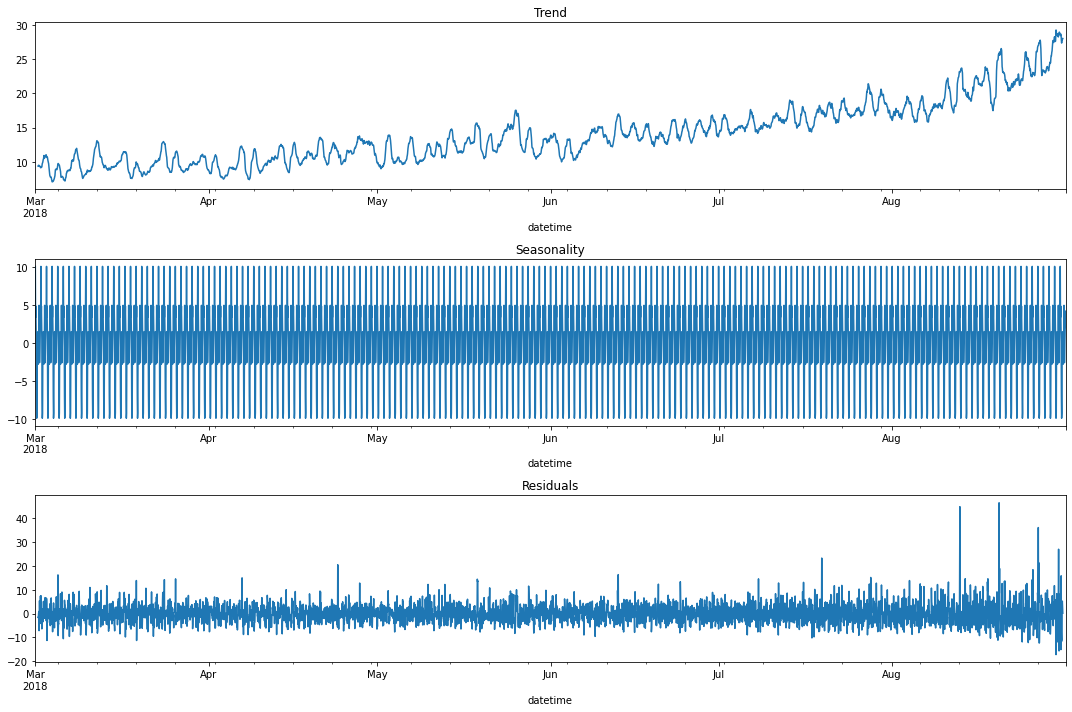

In [134]:
plt.figure(figsize=(15, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Сделать декомпозицию по своему, посчитать критерий дики-фуллера, дифференцировать ряд, посмотреть на прогнозирование в тренажере, добавить доп. признаки

In [131]:
#Доавим столбец с скользящим средним и стандартным скользящим отклонением
data['rolling_mean'] = data.rolling(10).mean()
data['std'] = data['num_orders'].rolling(10).std()

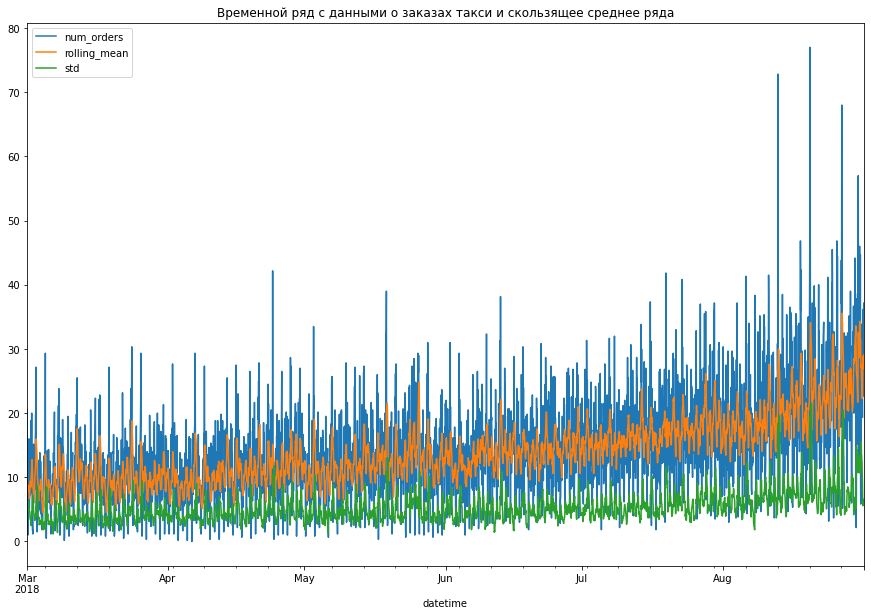

In [132]:
data.plot(figsize=(15,10), title="Временной ряд с данными о заказах такси и скользящее среднее ряда")
plt.show()

In [94]:
data

,num_orders,rolling_mean
datetime,,
2018-03-01 00:00:00,20.666667,NaN
2018-03-01 01:00:00,14.166667,NaN
2018-03-01 02:00:00,11.833333,NaN
2018-03-01 03:00:00,11.000000,NaN
2018-03-01 04:00:00,7.166667,NaN
...,...,...
2018-08-31 19:00:00,22.666667,27.766667
2018-08-31 20:00:00,25.666667,27.150000
2018-08-31 21:00:00,26.500000,27.016667


## Обучение моделей

## Проверка модели на тестовой выборке